In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       LogisticRegression(C=100.0,solver="lbfgs"))
pipe_lr.fit(X_train,y_train)
pred = pipe_lr.predict(X_test)
print("Accuracy: {}".format(pipe_lr.score(X_test,y_test)))

Accuracy: 0.958041958041958


In [6]:
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [240 143], Acc: 0.953
Fold:  2, Class dist.: [240 143], Acc: 0.953
Fold:  3, Class dist.: [240 143], Acc: 0.930
Fold:  4, Class dist.: [240 143], Acc: 0.930
Fold:  5, Class dist.: [240 143], Acc: 0.860
Fold:  6, Class dist.: [240 143], Acc: 0.953
Fold:  7, Class dist.: [241 143], Acc: 0.929
Fold:  8, Class dist.: [241 143], Acc: 0.976
Fold:  9, Class dist.: [241 143], Acc: 0.976
Fold: 10, Class dist.: [240 144], Acc: 1.000

CV accuracy: 0.946 +/- 0.036


In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs =1)
print("Accuracy scores: {}".format(scores))
print('\n',np.mean(scores))

Accuracy scores: [0.95348837 0.95348837 0.93023256 0.93023256 0.86046512 0.95348837
 0.92857143 0.97619048 0.97619048 1.        ]

 0.946234772978959


In [8]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(penalty="l2",
                                         random_state=1,
                                         solver ="lbfgs",
                                         max_iter=10000))

train_sizes,train_scores,test_scores = learning_curve(estimator=pipe_lr,
                                                     X=X_train,
                                                     y=y_train,
                                                     train_sizes=np.linspace(0.1,1.0,10),
                                                     cv=10,
                                                     n_jobs=1)

In [9]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(train_scores,axis=1)
test_std = np.std(test_scores,axis=1)

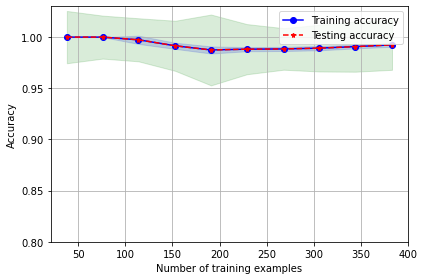

In [10]:
plt.plot(train_sizes,train_mean,color="blue",marker="o",label="Training accuracy")
plt.fill_between(train_sizes,
                train_mean+train_std,
                train_mean-train_std,
                alpha=0.15,
                color="blue")

plt.plot(train_sizes,test_mean,
        color="red",linestyle="--",
        marker="*",markersize=5,
        label="Testing accuracy")

plt.fill_between(train_sizes,
                test_mean+test_std,
                test_mean-test_std,
                alpha=0.15,color="green")
plt.grid()
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.ylim([0.8,1.03])
plt.tight_layout()

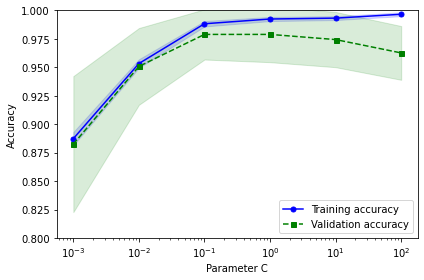

In [11]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                        SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{"svc__C":param_range,
              "svc__kernel":['linear']}, 
              {"svc__gamma":param_range,
              "svc__kernel":['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring="accuracy",
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9859911406423034
{'svc__C': 1.0, 'svc__kernel': 'linear'}


In [23]:
clf = gs.best_estimator_
print("Test accuracy: {}".format(clf.score(X_test,y_test)))

Test accuracy: 0.958041958041958


In [27]:
from sklearn.tree import DecisionTreeClassifier
param_grid = [{"max_depth":[1,2,3,4,5,6,7,None]}]
cs = GridSearchCV(estimator=DecisionTreeClassifier(),
                 param_grid=param_grid,
                 scoring="accuracy",
                 cv=2)
scores = cross_val_score(cs,X_train,y_train,scoring="accuracy",cv=5)
print("Accuracy: {}".format(np.mean(scores)))

Accuracy: 0.9271956224350205


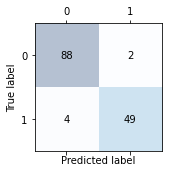

In [29]:
from sklearn.metrics import confusion_matrix
pipe_svc=pipe_svc.fit(X_train,y_train)
pred = pipe_svc.predict(X_test)
conf_mat = confusion_matrix(y_test,pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(conf_mat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j,y=i,s=conf_mat[i,j],va="center",ha="center")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:")